In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.display.max_columns = 2000

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['.DS_Store', 'test.csv', 'train.csv']


In [71]:
#Settings

subgroup_columns = ['severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack', 'sexual_explicit']

identity_columns = ['male', 'female', 'homosexual_gay_or_lesbian', 'christian', 'jewish', 'muslim', 'black', 
                    'white', 'psychiatric_or_mental_illness']


In [46]:
train_source = pd.read_csv('../input/train.csv')
test_source = pd.read_csv('../input/test.csv')

train = train_source
test = test_source

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


In [48]:
display(train.describe())

,id,target,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,publication_id,parent_id,article_id,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
count,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.000000,405130.00000,1.804874e+06,1.026228e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06
mean,3.738434e+06,1.030173e-01,4.582099e-03,1.387721e-02,2.263571e-02,8.115273e-02,9.311271e-03,0.011964,0.003205,0.001884,0.034393,0.001410,0.095268,0.127670,0.003237,0.001457,0.025611,0.001088,0.017863,0.006127,0.108687,0.049460,0.001220,0.000884,0.008248,0.006761,0.001494,0.001356,0.012083,0.006724,0.05695,4.986296e+01,3.722687e+06,2.813597e+05,2.779269e-01,4.420696e-02,1.091173e-01,2.446167e+00,5.843688e-01,6.605974e-03,1.439019e+00,8.784694e+00
std,2.445187e+06,1.970757e-01,2.286128e-02,6.460419e-02,7.873156e-02,1.760657e-01,4.942218e-02,0.087166,0.050193,0.026077,0.167900,0.030923,0.256671,0.305384,0.045801,0.030862,0.143739,0.016032,0.122145,0.058684,0.267894,0.202459,0.014102,0.011853,0.042717,0.037504,0.015374,0.017505,0.089183,0.069027,0.21596,2.769869e+01,2.450261e+06,1.039293e+05,1.055313e+00,2.449359e-01,4.555363e-01,4.727924e+00,1.866589e+00,4.529782e-02,1.787041e+01,4.350086e+01
min,5.984800e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000e+00,6.100600e+04,2.006000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
25%,7.969752e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.100000e+01,7.960188e+05,1.601200e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
50%,5.223774e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,5.400000e+01,5.222993e+06,3.321260e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
75%,5.769854e+06,1.666667e-01,0.000000e+00,0.000000e+00,0.000000e+00,9.090909e-02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,5.400000e+01,5.775758e+06,3.662370e+05,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
max,6.334010e+06,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1

### Sample the train and test data

In [63]:
train_source.sample(3)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,toxic
1785905,6310363,0.0,And if there's one demographic you're obviousl...,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,2017-11-07 21:02:06.387312+00,55,6309974.0,398090,approved,0,0,0,0,0,0.0,0,4,0
1087137,5445163,0.0,"Going among the people, visiting every parish,...",0.0,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,2017-06-20 12:17:12.058543+00,53,NaN,346394,approved,0,0,0,10,0,0.0,0,4,0
312723,625156,0.0,"you're the one trying to silence voters, by ma...",0.0,0.0,0.0,0.0,0.166667,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,2016-11-24 18:51:26.437782+00,54,624777.0,152808,approved,0,0,0,2,5,0.0,0,6,0


In [66]:
a = train.sample(3)
a

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,toxic
166960,446199,0.4,Commenter: Name a single politician who won't ...,0.0,0.0,0.3,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-08-24 22:58:03.895176+00,13,445267.0,144366,approved,0,0,0,1,0,0.0,4,10,0
476784,828793,0.0,"Enemies of America, be very afraid! This is th...",0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,2017-01-12 13:57:04.311594+00,54,NaN,161383,approved,2,0,1,4,1,0.0,0,4,0
958699,5291199,0.0,The Religion of Peace.,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,2017-05-23 15:07:17.615441+00,21,NaN,336725,approved,0,0,0,8,0,0.0,0,4,0


In [65]:
a['homosexual_gay_or_lesbian'].isnull()

206576    False
764763    False
103308    False
Name: homosexual_gay_or_lesbian, dtype: bool

In [50]:
test.sample(3)

,id,comment_text
67034,7067034,There is little doubt that republicans will su...
82657,7082657,And it is high time to raise our voice against...
92622,7092622,This is socialized single-payer government run...


### Train and test stats

In [51]:
test_percent = len(test)/len(train)
train_toxic =(train['target'].values > 0.5).astype(bool).astype(np.int)
train['toxic'] = train_toxic
toxic_comment_distribution = train_toxic.sum()/len(train_toxic)

In [52]:
print("The train set contains {} number of samples".format(len(train)))
print("The test set contains {} number of samples".format(len(test)))
print("The test set is {0:1f}% of the training set".format(test_percent * 100))
print("The test set contains {} toxic comment".format(train_toxic.sum()))
print("Toxic comments are {}% of the total comments".format(toxic_comment_distribution * 100))


The train set contains 1804874 number of samples
The test set contains 97320 number of samples
The test set is 5.392066% of the training set
The test set contains 106438 toxic comment
Toxic comments are 5.8972537695152125% of the total comments


### Toxicity distribution

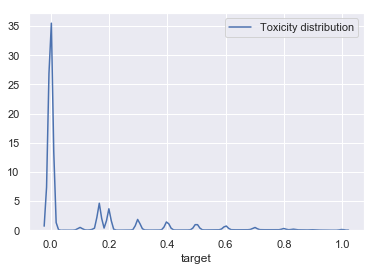

In [53]:
sns.distplot(train['target'], hist=False, kde=True, label="Toxicity distribution")

### Identity stats

In [54]:
identity_columns = [
    'male', 'female', 'homosexual_gay_or_lesbian', 'christian', 'jewish',
    'muslim', 'black', 'white', 'psychiatric_or_mental_illness']


# train[identity_columns].fillna(0).values>=0.5).sum(axis=1).astype(bool).astype(np.int)

train[identity_columns] = train[identity_columns].fillna(0)

In [115]:
def get_toxic_stats_per_flag(train, col, threshold = 0.0):

    is_rel = train[col] > threshold
    na_count = train_source[col].isnull().sum()
    rel_records = train[is_rel]
    toxic_count = rel_records['toxic'].sum()
    toxic_percent = toxic_count/len(rel_records)
    return(col, toxic_count, len(rel_records), toxic_percent, na_count)
    

In [116]:
toxic_stats = pd.DataFrame(columns=["identity", "toxic_count", "count", "toxic_percent", "na_count"])

for index, col in enumerate(identity_columns):
    toxic_stats.loc[index] = get_toxic_stats_per_flag(train, col)
    
print(toxic_stats)


                        identity toxic_count  count  toxic_percent na_count
0                           male        8284  80179       0.103319        0
1                         female        7215  73690       0.097910        0
2      homosexual_gay_or_lesbian        2612  15307       0.170641        0
3                      christian        3418  61360       0.055704        0
4                         jewish        1028  10905       0.094269        0
5                         muslim        3731  26650       0.140000        0
6                          black        3745  19563       0.191433        0
7                          white        5350  29948       0.178643        0
8  psychiatric_or_mental_illness        1802  10665       0.168964        0


### No identity stats

In [93]:
def build_no_identities_expression(train):
    expr = None
    for col in identity_columns:

        tmp = (train[col] == 0)

        if expr is None:
            expr = tmp
        else:        
            expr = expr & tmp
    return expr



no_identity_train = train[build_no_identities_expression(train)]


            

In [98]:
no_identity_toxic_count = len(no_identity_train[(no_identity_train['toxic'] > 0)])

no_identity_count = len(no_identity_train)

no_identity_toxic_percent = no_identity_toxic_count / no_identity_count




In [99]:
print("The number of samples with no identity is {}".format(no_identity_count))
print("The number of samples with no identity who are toxic is {}".format(no_identity_toxic_count))
print("The number of samples with no identity who are toxic is {}% ".format(no_identity_toxic_percent * 100))


The number of samples with no identity is 1594682
The number of samples with no identity who are toxic is 84154
The number of samples with no identity who are toxic is 5.277164977092612% 


### Subgroups

In [121]:
toxic_subgroup_stats = pd.DataFrame(columns=["subgroup", "toxic_count", "count", "toxic_percent", "na_count"])

for index, col in enumerate(subgroup_columns):
    toxic_subgroup_stats.loc[index] = get_toxic_stats_per_flag(train, col, .9)
    
print(toxic_subgroup_stats)


          subgroup toxic_count count  toxic_percent na_count
0  severe_toxicity           1     1       1.000000        0
1          obscene         313   313       1.000000        0
2           threat         220   220       1.000000        0
3           insult        5450  5450       1.000000        0
4  identity_attack         242   242       1.000000        0
5  sexual_explicit         110   111       0.990991        0


From above it seems quite odd that some record, although marked as `severe_toxicity` 

In [133]:
train[(train['severe_toxicity'] > .9)]

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,toxic
1377740,5801652,1.0,Awesome! Lets cut the head off hate! Lets stab...,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,2017-08-19 17:33:30.941935+00,21,NaN,368010,rejected,0,0,0,0,0,0.0,0,4,1


### Is there a correlation between identities

Sample 10000 records and check if there is any evident correlation between identities

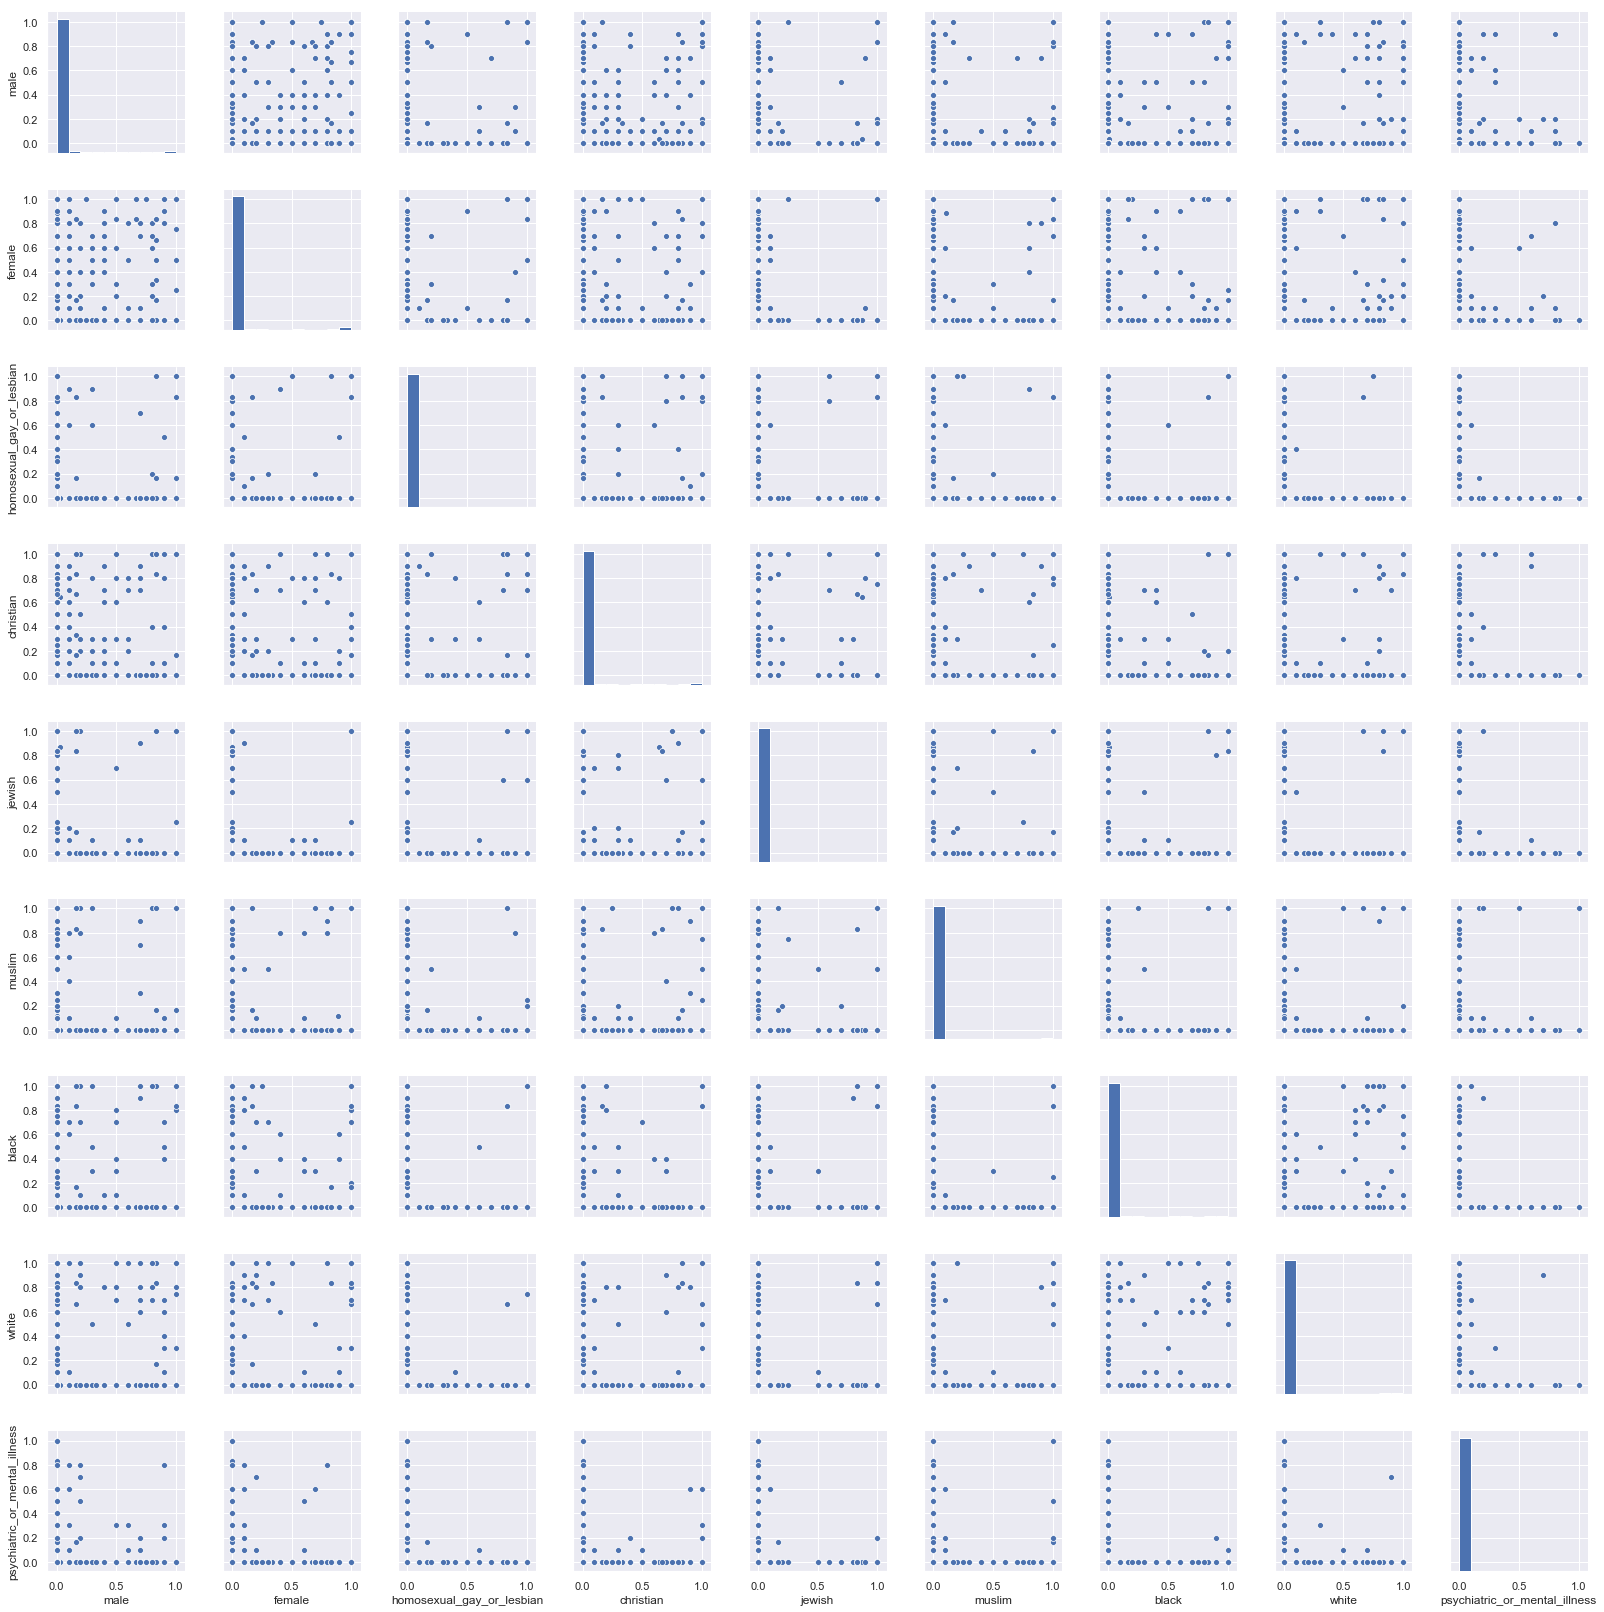

In [16]:
sns.pairplot(train[identity_columns].sample(10000))

In [37]:
toxic_records = train[train["toxic"] == 1]

In [38]:
len(toxic_records)

106438